In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd

In [3]:
gen_event_ = "ttbar-100"
outfile_ = "outfile-" + gen_event_ + ".root"
data_ = uproot.open(outfile_)["ntuples"]["tree"]
data_.keys()

['nevent',
 'nlumi',
 'nrun',
 'trackEta',
 'trackPhi',
 'qoverp',
 'dxy',
 'dsz',
 'trackPt',
 'trackTPIdx',
 'trackEtaError',
 'trackPhiError',
 'qoverpError',
 'dxyError',
 'dszError',
 'trackPtError',
 'trackParameters',
 'covarianceArray',
 'stereoHitX',
 'stereoHitY',
 'stereoHitZ',
 'stereoHitR',
 'stereoHitPhi',
 'stereoHitEta',
 'stereoHitLayer',
 'stereoTPIndex',
 'stereoHitMatch',
 'monoHitX',
 'monoHitY',
 'monoHitZ',
 'monoHitR',
 'monoHitPhi',
 'monoHitEta',
 'monoHitLayer',
 'monoTPIndex',
 'monoHitMatch']

In [4]:
from mpl_toolkits.mplot3d import Axes3D

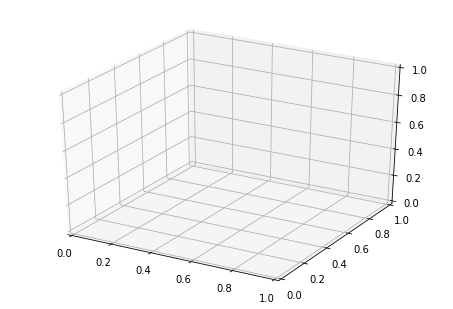

In [5]:
fig_ = plt.figure()
ax_ = Axes3D(fig_)

In [6]:
# Find Number of Events based on any property length
track_eta_ = data_.array("trackEta")
print "Number of Events: ", len(track_eta_)

Number of Events:  100


Iterating over trackEta from 4564 tracks


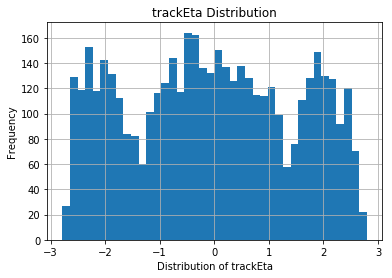

Iterating over trackPhi from 4564 tracks


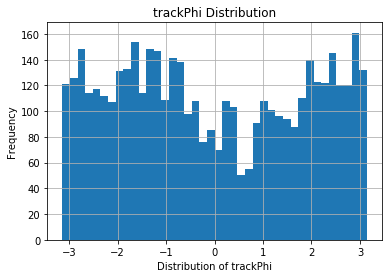

Iterating over qoverp from 4564 tracks


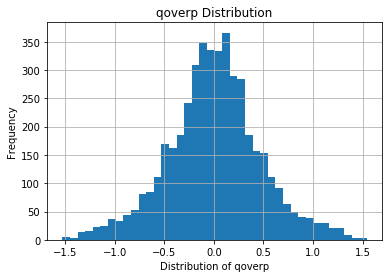

Iterating over dxy from 4564 tracks


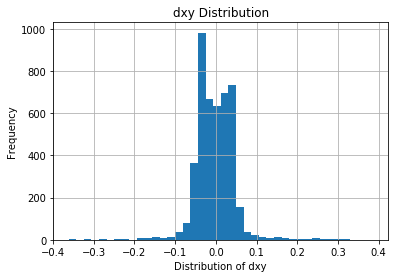

Iterating over dsz from 4564 tracks


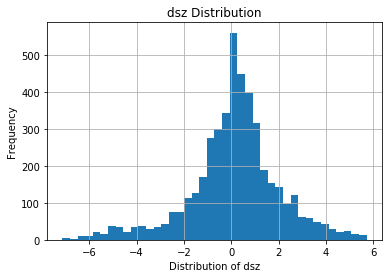

In [59]:
'''
track_properties_ = []
for key in data_.keys():
    if key == 'trackParameters' or key == 'covarianceArray' or 'Hit' in key or 'n' in key or 'Error' in key:
        continue
    else:
        track_properties_.append(key)
'''

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)
    concat_track_param_ = []
    
    for j in range(len(track_param_)):
        concat_track_param_.extend(track_param_[j])
    print "Iterating over", key, "from", len(concat_track_param_), "tracks"
    
    plt.clf()
    ax_ = plt.subplot()
    ax_.hist(concat_track_param_, histtype='stepfilled', bins=40, orientation='vertical')
    plt.grid(True)
    plt.ylabel('Frequency')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/track/' + key)
    plt.show()

2919


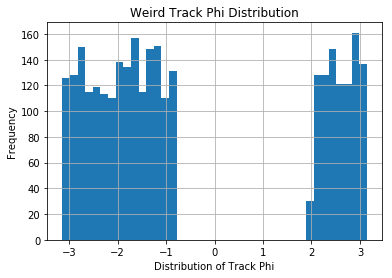

In [70]:
# Check what is causing trackPhi aberrations

track_phi_ = data_.array('trackPhi')
concat_track_phi_ = []
anomalous_phi_event_number_ = []
for i in range(len(track_phi_)):
    
    for j in range(len(track_phi_[i])):
        if (track_phi_[i][j] >= -0.8) and (track_phi_[i][j] <= 2):
            anomalous_phi_event_number_.append(i)
            continue
        else:    
            concat_track_phi_.append(track_phi_[i][j])
        
print len(concat_track_phi_)
ax_ = plt.subplot()
ax_.hist(concat_track_phi_, histtype='stepfilled', bins=40, orientation='vertical')
plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Distribution of Track Phi')
plt.title('Weird Track Phi Distribution')
plt.show()

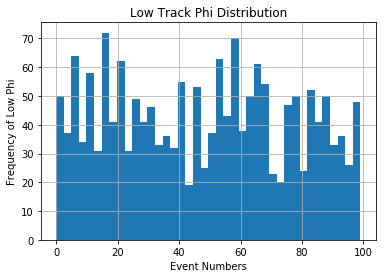

In [83]:
check_events_with_odd_phi_ = np.bincount(anomalous_phi_event_number_)
index_of_weird_events_ = list(set(anomalous_phi_event_number_))
# print anomalous_phi_event_number_
ax_ = plt.subplot()
ax_.hist(index_of_weird_events_, weights=check_events_with_odd_phi_, histtype='stepfilled', bins=40, orientation='vertical')
plt.grid(True)
plt.ylabel('Frequency of Low Phi')
plt.xlabel('Event Numbers')
plt.title('Low Track Phi Distribution')
plt.show()

In [42]:
plt.clf()

<Figure size 432x288 with 0 Axes>

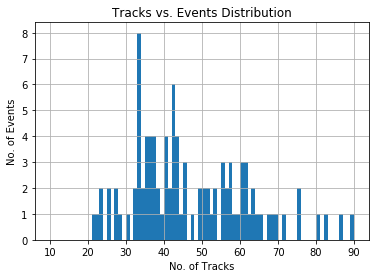

In [43]:
# Plot the distribution of tracks over events 
# using the length of any paramater array - e.g. track eta

track_Eta_ = data_.array("trackEta")
concat_num_tracks_ = []

for i in range(len(track_Eta_)):
     concat_num_tracks_.append(len(track_Eta_[i]))

ax_ = plt.subplot()
ax_.hist(concat_num_tracks_, histtype='bar', range=(10, 90), bins=80, align='mid', orientation='vertical')

plt.xlabel('No. of Tracks')
plt.ylabel('No. of Events')
plt.title('Tracks vs. Events Distribution')
plt.grid(True)
plt.savefig('plots/' + gen_event_ + '/track/event-track-distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

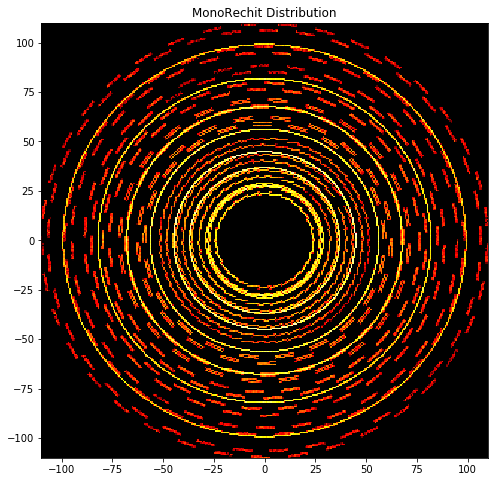

In [37]:
# ToDo: Add lognorm colormap

mono_x_ = data_.array("monoHitX") 
mono_y_ = data_.array("monoHitY")
mono_z_ = data_.array("monoHitZ")

 

if len(mono_x_) == len(mono_y_):
    concat_mono_x_ = []
    concat_mono_y_ = []

    for i in range(len(mono_x_)):
        concat_mono_x_.extend(mono_x_[i])
        concat_mono_y_.extend(mono_y_[i])

plt.clf()
fig, ax_ = plt.subplots(figsize=(8, 8))
# Plot the 2D Histogram for Mono Rechits
plt.title('MonoRechit Distribution')
ax_.patch.set_facecolor('black')
plt.hist2d(concat_mono_x_, concat_mono_y_, bins=300, norm=matplotlib.colors.LogNorm(), cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

<Figure size 432x288 with 0 Axes>

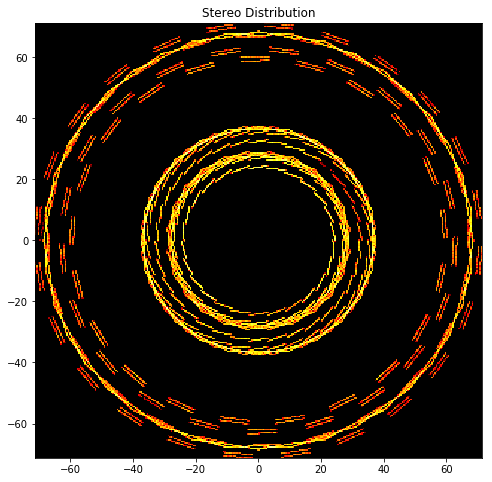

In [36]:
# ToDo: Add lognorm colormap

stereo_x_ = data_.array("stereoHitX") 
stereo_y_ = data_.array("stereoHitY")
stereo_z_ = data_.array("stereoHitZ")

 

if len(mono_x_) == len(mono_y_):
    concat_stereo_x_ = []
    concat_stereo_y_ = []

    for i in range(len(mono_x_)):
        concat_stereo_x_.extend(stereo_x_[i])
        concat_stereo_y_.extend(stereo_y_[i])

plt.clf()
fig, ax_ = plt.subplots(figsize=(8, 8))
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('Stereo Distribution')
ax_.patch.set_facecolor('black')
ax_.hist2d(concat_stereo_x_, concat_stereo_y_, bins=300, norm=matplotlib.colors.LogNorm(), cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

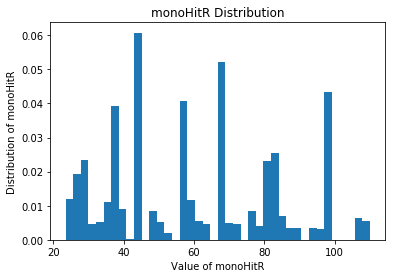

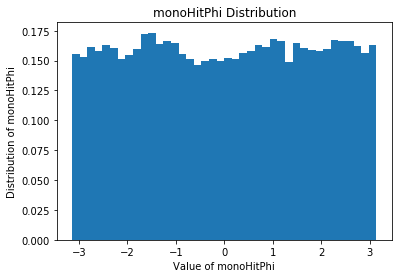

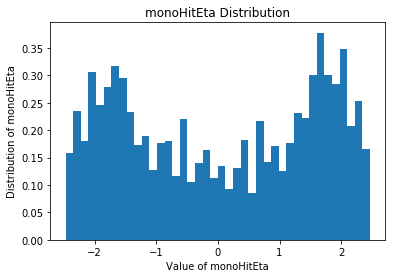

In [38]:
# Define a loop that plots R, Phi, and Eta for Mono Hits

for param in ["monoHitR", "monoHitPhi", "monoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    ax_ = plt.subplot()
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=40, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/mono/' + param)
    plt.show()

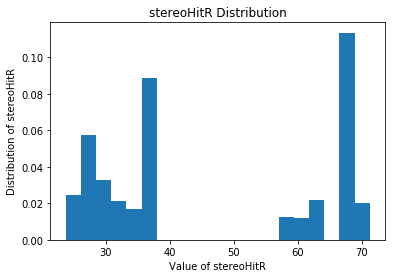

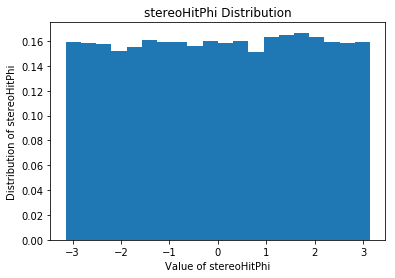

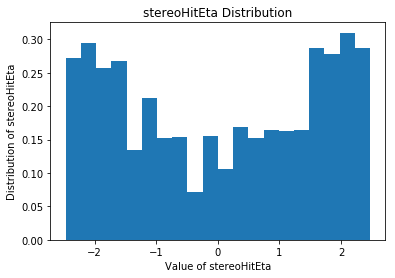

In [138]:
# Define a loop that plots R, Phi, and Eta for Stereo Hits

for param in ["stereoHitR", "stereoHitPhi", "stereoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    ax_ = plt.subplot()
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=20, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/mono/' + param)
    plt.show()

In [139]:
stereo_tp_idx_ = data_.array('stereoTPIndex')
track_tp_idx_ = data_.array('trackTPIdx')

In [140]:
tmp_ = []
for j in range(len(stereo_tp_idx_)):
    tmp_.append(stereo_tp_idx_[j].tolist().count(-1))

print len(track_tp_idx_) == len(stereo_tp_idx_)

True


In [141]:
matched_hits_ = 0
matched_stereo_rechit_ = data_.array('stereoHitMatch')
matched_tracks_ = 0
no_matched_tracks_ = []
# This should not be required with the availability of "matched hit" 
# Iterate over all events and track indices to find a match for rechits
for j in range(len(stereo_tp_idx_)):
    # Print the number of points in each event
    # print len(stereo_tp_idx_[j]), "hits from", len(set(stereo_tp_idx_[j])), "tracking particles"
    unique_tracks_matched_per_event_ = 0
    
    for i in list(set(stereo_tp_idx_[j])):
        if i in track_tp_idx_[j]:
            unique_tracks_matched_per_event_+=1
    
    # Count the entries with hit match value = 1
    # Use this to corroborate that you're counting the right hits
    hit_match_count_ = np.bincount(matched_stereo_rechit_[j])
    
    # The above statement returns an array with count of 0's and 1's
    # we need only the 1's
    if len(hit_match_count_) == 2:
        print hit_match_count_[1], "/",  len(stereo_tp_idx_[j]), "hits matched to",
        print unique_tracks_matched_per_event_,"/", len(track_tp_idx_[j]),"tracks"
        print "No Match for", stereo_tp_idx_[j].tolist().count(-1), "hits and", track_tp_idx_[j].tolist().count(-2), "tracks"
        matched_hits_ += hit_match_count_[1]
    else:
        print "No hits matched for event-----------------------", j
        no_matched_tracks_.append([j, hit_match_count_[0], len(stereo_tp_idx_[j]), unique_tracks_matched_per_event_, len(track_tp_idx_[j])])
    matched_tracks_ += unique_tracks_matched_per_event_
    

total_hits_ = sum([len(hits) for hits in stereo_tp_idx_])
total_tracks_ = sum([len(tracks) for tracks in track_tp_idx_])
# Summary
print "\n", matched_hits_, "/", total_hits_, "hits matched to", matched_tracks_, "/", total_tracks_, "tracks\n"

for unmatched_event_ in no_matched_tracks_:
    print unmatched_event_[1], "hits with zero TP of total",  unmatched_event_[2], "hits and",
    print unmatched_event_[3],"/", unmatched_event_[4],"matched tracks"

unmatched_event_numbers_ = []
for event_data_ in no_matched_tracks_:
    print "\nEvent", event_data_[0]
    unmatched_event_numbers_.append(event_data_[0])
    print "TP = 0:", stereo_tp_idx_[event_data_[0]].tolist().count(0), "hits and", track_tp_idx_[event_data_[0]].tolist().count(0), "tracks"
    print "No Rechit TP Match for", stereo_tp_idx_[event_data_[0]].tolist().count(-1), "/", event_data_[2], "hits"
    print "No Track TP Match:", track_tp_idx_[event_data_[0]].tolist().count(-2), "/", event_data_[4], "tracks"
    #print "Total Particles:", len(stereo_tp_idx_[event_data_[0]])

    for i in track_tp_idx_[event_data_[0]]:
        if i in stereo_tp_idx_[event_data_[0]]:
            print "ERROR: Match found ---------------------------", i

179 / 2142 hits matched to 29 / 37 tracks
No Match for 584 hits and 5 tracks
162 / 2071 hits matched to 34 / 42 tracks
No Match for 653 hits and 3 tracks
254 / 2054 hits matched to 57 / 64 tracks
No Match for 506 hits and 5 tracks
363 / 3375 hits matched to 73 / 90 tracks
No Match for 780 hits and 11 tracks
198 / 1877 hits matched to 45 / 49 tracks
No Match for 430 hits and 2 tracks
316 / 2766 hits matched to 60 / 65 tracks
No Match for 639 hits and 3 tracks
195 / 2151 hits matched to 35 / 35 tracks
No Match for 641 hits and 0 tracks
163 / 1835 hits matched to 32 / 42 tracks
No Match for 432 hits and 6 tracks
219 / 2165 hits matched to 48 / 75 tracks
No Match for 522 hits and 17 tracks
141 / 1327 hits matched to 31 / 38 tracks
No Match for 307 hits and 2 tracks
No hits matched for event----------------------- 10
223 / 1951 hits matched to 44 / 55 tracks
No Match for 556 hits and 4 tracks
172 / 1404 hits matched to 38 / 40 tracks
No Match for 385 hits and 1 tracks
116 / 1152 hits matche

161 / 1026 hits matched to 35 / 36 tracks
No Match for 213 hits and 1 tracks
131 / 1361 hits matched to 26 / 27 tracks
No Match for 347 hits and 0 tracks
240 / 2274 hits matched to 54 / 60 tracks
No Match for 611 hits and 3 tracks
185 / 1918 hits matched to 39 / 43 tracks
No Match for 456 hits and 1 tracks
224 / 2974 hits matched to 44 / 56 tracks
No Match for 871 hits and 7 tracks
194 / 2205 hits matched to 42 / 46 tracks
No Match for 541 hits and 0 tracks
93 / 898 hits matched to 20 / 23 tracks
No Match for 298 hits and 1 tracks
134 / 1256 hits matched to 25 / 31 tracks
No Match for 364 hits and 2 tracks
76 / 1201 hits matched to 16 / 20 tracks
No Match for 311 hits and 0 tracks
156 / 876 hits matched to 25 / 30 tracks
No Match for 202 hits and 1 tracks
269 / 2066 hits matched to 57 / 63 tracks
No Match for 577 hits and 5 tracks
238 / 1793 hits matched to 41 / 49 tracks
No Match for 404 hits and 7 tracks
129 / 1067 hits matched to 26 / 28 tracks
No Match for 271 hits and 1 tracks
219

194 / 2207 hits matched to 38 / 40 tracks
No Match for 650 hits and 0 tracks
250 / 2524 hits matched to 48 / 55 tracks
No Match for 741 hits and 4 tracks
167 / 1330 hits matched to 33 / 36 tracks
No Match for 272 hits and 2 tracks
151 / 1547 hits matched to 23 / 28 tracks
No Match for 471 hits and 4 tracks
257 / 2581 hits matched to 57 / 68 tracks
No Match for 617 hits and 4 tracks
187 / 1884 hits matched to 38 / 43 tracks
No Match for 419 hits and 1 tracks
288 / 2414 hits matched to 58 / 69 tracks
No Match for 617 hits and 9 tracks
198 / 1517 hits matched to 41 / 45 tracks
No Match for 334 hits and 2 tracks
154 / 1428 hits matched to 31 / 35 tracks
No Match for 375 hits and 2 tracks
123 / 1554 hits matched to 31 / 37 tracks
No Match for 466 hits and 6 tracks
184 / 1586 hits matched to 39 / 48 tracks
No Match for 470 hits and 5 tracks
222 / 2262 hits matched to 46 / 55 tracks
No Match for 694 hits and 4 tracks
340 / 2575 hits matched to 68 / 72 tracks
No Match for 729 hits and 1 tracks

245 / 1869 hits matched to 42 / 51 tracks
No Match for 493 hits and 3 tracks
156 / 1134 hits matched to 26 / 30 tracks
No Match for 270 hits and 0 tracks
228 / 2345 hits matched to 46 / 57 tracks
No Match for 596 hits and 6 tracks
182 / 1881 hits matched to 39 / 46 tracks
No Match for 430 hits and 5 tracks
125 / 1452 hits matched to 25 / 33 tracks
No Match for 390 hits and 5 tracks
83 / 945 hits matched to 16 / 22 tracks
No Match for 164 hits and 5 tracks
112 / 1023 hits matched to 27 / 28 tracks
No Match for 267 hits and 0 tracks
57 / 1053 hits matched to 13 / 16 tracks
No Match for 357 hits and 1 tracks
169 / 1851 hits matched to 38 / 49 tracks
No Match for 536 hits and 8 tracks
159 / 1264 hits matched to 34 / 36 tracks
No Match for 241 hits and 1 tracks
94 / 907 hits matched to 18 / 20 tracks
No Match for 267 hits and 1 tracks
224 / 2662 hits matched to 41 / 52 tracks
No Match for 784 hits and 5 tracks
216 / 1825 hits matched to 41 / 44 tracks
No Match for 538 hits and 2 tracks
166 

195 / 1741 hits matched to 34 / 35 tracks
No Match for 554 hits and 1 tracks
199 / 1671 hits matched to 40 / 43 tracks
No Match for 494 hits and 1 tracks
278 / 2204 hits matched to 59 / 64 tracks
No Match for 458 hits and 2 tracks
254 / 2872 hits matched to 51 / 57 tracks
No Match for 820 hits and 5 tracks
115 / 1321 hits matched to 24 / 28 tracks
No Match for 300 hits and 4 tracks
121 / 1118 hits matched to 23 / 27 tracks
No Match for 302 hits and 3 tracks
172 / 2217 hits matched to 38 / 41 tracks
No Match for 515 hits and 0 tracks
113 / 1405 hits matched to 23 / 28 tracks
No Match for 350 hits and 0 tracks
135 / 1292 hits matched to 24 / 32 tracks
No Match for 405 hits and 1 tracks
180 / 1652 hits matched to 36 / 42 tracks
No Match for 516 hits and 5 tracks
204 / 1888 hits matched to 39 / 45 tracks
No Match for 454 hits and 2 tracks
No hits matched for event----------------------- 478
291 / 1616 hits matched to 59 / 70 tracks
No Match for 409 hits and 5 tracks
169 / 1710 hits matched

Iterating over trackEta
Number of elements: 21533


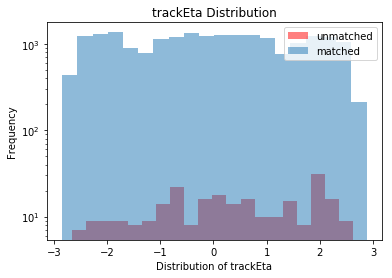

Iterating over trackPhi
Number of elements: 21533


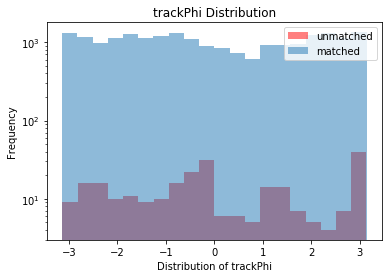

Iterating over qoverp
Number of elements: 21533


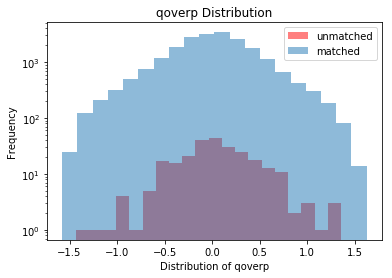

Iterating over dxy
Number of elements: 21533


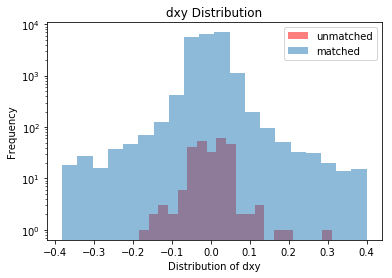

Iterating over dsz
Number of elements: 21533


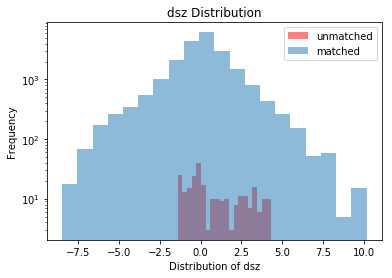

In [142]:

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)
    unmatched_data_ = []
    concat_track_param_ = []
    print "Iterating over", key
    
    for j in range(len(track_param_)):
        if j in unmatched_event_numbers_:
            # Use the event number from the stored data for the event with no matched tracks
            unmatched_data_.extend(track_param_[j])
        else:
            concat_track_param_.extend(track_param_[j])
    
    print "Number of elements:", len(concat_track_param_)
    ax_ = plt.subplot()        
        
    # Plot that single element on the histogram in a different color
    plt.hist(unmatched_data_, histtype='bar', bins=20, align='mid', orientation='vertical', color='red', alpha=0.5, label='unmatched')

    #plt.hist([unmatched_data_, concat_track_param_], histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label=['unmatched', 'matched'])
    plt.hist(concat_track_param_, histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label='matched')
    
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    # plt.savefig('plots/' + gen_event_ + '/track/' + key)
    plt.show()

Iterating over trackEta
Discarded 13674 and matched 8016 / 8117 tracks


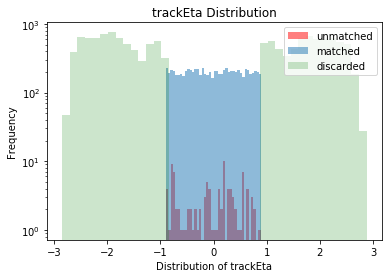

Iterating over trackPhi
Discarded 13674 and matched 8016 / 8117 tracks


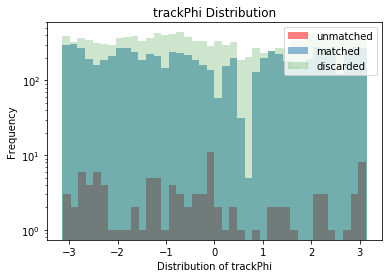

Iterating over qoverp
Discarded 13674 and matched 8016 / 8117 tracks


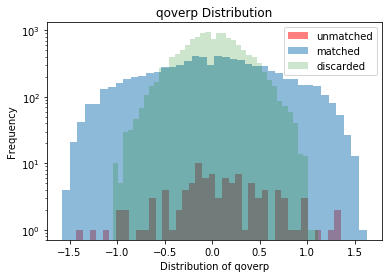

Iterating over dxy
Discarded 13674 and matched 8016 / 8117 tracks


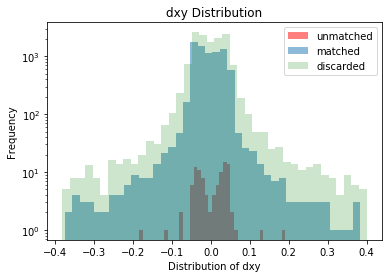

Iterating over dsz
Discarded 13674 and matched 8016 / 8117 tracks


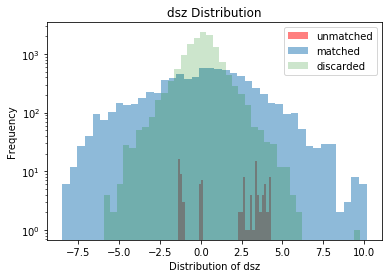

In [143]:
track_eta_ = data_.array('trackEta')

for i, key in zip(range(5), ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]):
    track_param_ = data_.array(key)
    print "Iterating over", key

    
    discarded_track_param_ = []
    concat_track_param_ = []
    unmatched_track_param_ = []

    for j in range(len(track_param_)):
        for k in range(len(track_param_[j])):
            
            # Constrain the track eta value
            if track_eta_[j][k] < 0.9 and track_eta_[j][k] > (-0.9):
                if j in unmatched_event_numbers_:
                    unmatched_track_param_.append(track_param_[j][k])
                else:
                    concat_track_param_.append(track_param_[j][k])
            else:
                discarded_track_param_.append(track_param_[j][k])
    
    print "Discarded", len(discarded_track_param_), "and matched", len(concat_track_param_), "/", 
    print len(concat_track_param_)+len(unmatched_track_param_), "tracks"
    ax_ = plt.subplot()
    
    # Plot that single element on the histogram in a different color
    plt.hist(unmatched_track_param_, histtype='bar', bins=40, align='mid', orientation='vertical', color='red', alpha=0.5, label='unmatched')

    #plt.hist([unmatched_data_, concat_track_param_], histtype='bar', bins=20, align='mid', orientation='vertical', alpha=0.5, label=['unmatched', 'matched'])
    plt.hist(concat_track_param_, histtype='bar', bins=40, align='mid', orientation='vertical', alpha=0.5, label='matched')
    plt.hist(discarded_track_param_, histtype='bar', bins=40, align='mid', orientation='vertical', alpha=0.2, color='green', label='discarded')
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/track/etabound-' + key)
    plt.show()
    
    

Discarded 13674 and matched 8016 / 8117 tracks


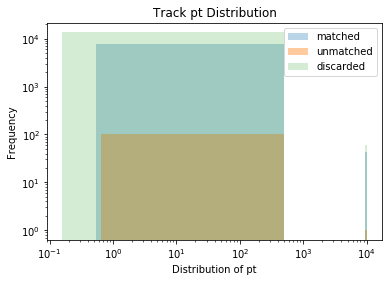

In [144]:
track_pt_ = data_.array('trackPt').tolist()
track_eta_ = data_.array('trackEta').tolist()
concat_track_pt_ = []
unmatched_track_pt_ = []
discarded_track_pt_= []

discarded_index_map_ = []

for j in range(len(track_pt_)):
    for k in range(len(track_pt_[j])):
       
        # Constrain the track eta value
        if track_eta_[j][k] < 0.9 and track_eta_[j][k] > (-0.9):
            if j in unmatched_event_numbers_:
                unmatched_track_pt_.append(track_pt_[j][k])
            else:
                concat_track_pt_.append(track_pt_[j][k])
        else:
            discarded_track_pt_.append(track_pt_[j][k])


print "Discarded", len(discarded_track_pt_), "and matched", len(concat_track_pt_), "/", len(concat_track_pt_) + len(unmatched_track_pt_), "tracks"


In [169]:
np.log10?

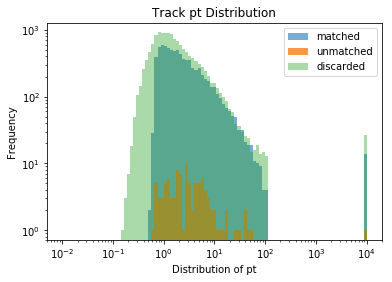

In [175]:
binning_ = np.logspace(np.log10(0.01), np.log10(10000), 100)
plt.hist(concat_track_pt_, histtype='bar', bins=binning_, align='mid', orientation='vertical', alpha=0.6, label='matched')
plt.hist(unmatched_track_pt_, histtype='bar', bins=binning_, align='mid', orientation='vertical', alpha=0.8, label='unmatched')
plt.hist(discarded_track_pt_, histtype='bar', bins=binning_, align='mid', orientation='vertical', alpha=0.4, label='discarded')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Distribution of pt')
plt.xscale('log')
plt.yscale('log')
plt.title('Track pt Distribution')
plt.savefig('plots/' + gen_event_ + '/track/etabound-trackpt-logscale')
plt.show()

In [145]:
# Check that the arrays are of equal lengths - i.e. each point has an index and an x, y, z coordinate
for i in range(len(stereo_tp_idx_)):
    #print len(stereo_tp_idx_[i]), len(stereo_x_[i])
    if len(stereo_tp_idx_[i]) != len(stereo_x_[i]) or len(stereo_tp_idx_[i]) != len(stereo_y_[i]) or len(stereo_tp_idx_[i]) != len(stereo_z_[i]):
        print "Length of indices and points does not match"
        if len(stereo_tp_idx_[i]) > len(stereo_x_[i]):
            print "There are", len(stereo_tp_idx_[i]) - len(stereo_x_[i]), "less hits than clusters"
        else:
            print "There are no cluster indices (even -1) for", len(stereo_x_[i]) - len(stereo_tp_idx_[i]), "hits"
            

In [146]:
total_tracks_ = sum([len(track) for track in track_tp_idx_])
print "Total tracks: ", total_tracks_

Total tracks:  21791


# associate a global track index for each rechit
'''
track_index_ = 0
x_counter_ = 0
rechit_track_map_ = {}
track_event_map_ = {}

for event in range(len(stereo_tp_idx_)):
    
    # Check if for that event that hit has a value of matched = 1
    for hitIndex in range(len(matched_stereo_rechit_[event])):
        
        if matched_stereo_rechit_[event][hitIndex] == 1:
            if stereo_tp_idx_[event][hitIndex] == -1:
                x_counter_+=1
                 
            else:
                
                # This means that hit has been matched to a track
                # Now associate a unique ID to that track index and
                # add that row into the rechit map
                unique_id_ = (event, stereo_tp_idx_[event][hitIndex])
            
            # Store the rechit properties on a per-track basis in a map
            # corresponding to one single track ID per list of rechit properties
            if unique_id_ in track_event_map_:
                # This means there is already a list at that value
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])
            else:
                # This means we need to create a list at that value
                track_event_map_[unique_id_] = track_index_
                track_index_ += 1
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]] = []
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event][hitIndex], stereo_y_[event][hitIndex], stereo_z_[event][hitIndex]])
'''

In [148]:
# associate a global track index for each rechit

# unique_id_ is a tuple of event number and track index for that event
# track_event_map_ associates a global unique index to each unique_id_
# rechit_track_map_ is a list of rechits associated with each global unique index

# This code block ignores the 'matchedHit' (0 or 1) column 
# because the current data does not have the correct length
track_index_ = 0
hitmatch_ = 0
rechit_track_map_ = {}
track_event_map_ = {}
nomatch_ = 0
total_rechits_ = 0

for event_ in range(len(stereo_tp_idx_)):
    
    # Check if for that event that hit has a value of matched = 1
    for hitIndex_ in range(len(matched_stereo_rechit_[event_])):
        total_rechits_+=1
        if stereo_tp_idx_[event_][hitIndex_] != -1 and stereo_tp_idx_[event_][hitIndex_] in track_tp_idx_[event_]: 
            hitmatch_+=1
                          
            # This means that hit has been matched to a track
            # Now associate a unique ID to that track index and
            # add that row into the rechit map
            unique_id_ = (event_, stereo_tp_idx_[event_][hitIndex_])
            
            # Store the rechit properties on a per-track basis in a map
            # corresponding to one single track ID per list of rechit properties
            if unique_id_ in track_event_map_:
                # This means there is already a list at that value
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event_][hitIndex_], stereo_y_[event_][hitIndex_], stereo_z_[event_][hitIndex_]])
            else:
                # This means we need to create a list at that value
                track_event_map_[unique_id_] = track_index_
                track_index_ += 1
                # You can add r, phi, eta, and whatever we need to store
                rechit_track_map_[track_event_map_[unique_id_]] = []
                rechit_track_map_[track_event_map_[unique_id_]].append(
                    [stereo_x_[event_][hitIndex_], stereo_y_[event_][hitIndex_], stereo_z_[event_][hitIndex_]])
        else:
            nomatch_+=1

In [149]:
print "Tracks matched for", hitmatch_, "of", total_rechits_, "rechits"

Tracks matched for 41075 of 321235 rechits


In [150]:
# This is a test to be used in case we utilise a matchedHit column in our code
x_counter_=0
matched_stereo_rechit_ = data_.array('stereoHitMatch')
for event_number_ in range(len(stereo_tp_idx_)):
    if len(matched_stereo_rechit_[event_number_]) != len(stereo_tp_idx_[event_number_]):
        print "The number of matched+unmatched and total hits does not tally"
        print "This is an issue for C++!"
        break

The number of matched+unmatched and total hits does not tally
This is an issue for C++!


In [151]:
for event_ in range(len(matched_stereo_rechit_)):
    for match_ in range(len(matched_stereo_rechit_[event_])):
        if stereo_tp_idx_[event_][match_]==1:
            if stereo_tp_idx_[event_][match_]==-1:
                print "Problem at", event_, match_
                break
            else:
                continue

In [152]:
#for key in sorted(track_event_map_):
#    print key, track_event_map_[key]    
#print sorted(track_event_map_.values())

In [153]:
track_count_ = {}
for track in rechit_track_map_.keys():
    count_ = len(rechit_track_map_[track])
    if count_ in track_count_:
        track_count_[count_] += 1
    else:
        track_count_[count_] = 1

In [154]:
track_count_

{1: 2514,
 2: 7028,
 3: 3424,
 4: 1663,
 5: 512,
 6: 210,
 7: 125,
 8: 84,
 9: 55,
 10: 43,
 11: 24,
 12: 18,
 13: 12,
 14: 9,
 15: 11,
 16: 8,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2}

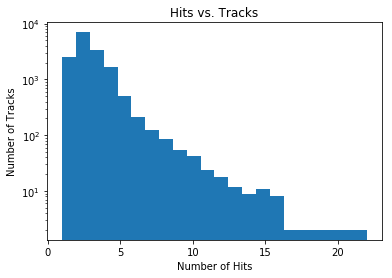

In [164]:
plt.clf()
ax_ = plt.subplot()
# Plot the Histogram for Tracks vs. Rechits
ax_.set_title('Hits vs. Tracks')
ax_.hist(track_count_.keys(), weights=track_count_.values(), bins=22)
plt.ylabel('Number of Tracks')
plt.yscale('log')
plt.xlabel('Number of Hits')
plt.savefig('plots/' + gen_event_ + '/track/hitdistribution')
plt.show()